# Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import calendar

# set the default figure size
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# font settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Dejavu Sans', 'Arial', 'Helvetica']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# line and marker settings
plt.rcParams['lines.linewidth'] = 1.2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.markeredgewidth'] = 0

# axes setting
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.05

# grid settings
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.axisbelow'] = True

# set background colors
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#F8F9FA'

def create_timeseries_plot(title=None, xlabel='Date', ylabel='Value',
                           figsize=(12, 6), grid=True):
    """
    Create a pre-styled figure and axes for time series plotting

    Parameters:
    ---
    title: str, optional
        Plot title
    xlabel: str
        X-axis label (default: 'Date')
    ylabel: str
        y-axis label (default: 'Value')
    figsize: tuple
        Figure size (width, height) in inches
    grid: bool
        Whether to show grid (default: True)

    Returns:
    ---
    fig, ax: matplotlib figure and axes objects
    """
    fig, ax = plt.subplots(figsize=figsize)

    if title:
        ax.set_title(title, fontweight='semibold', pad=15)

    ax.set_xlabel(xlabel, fontweight='medium')
    ax.set_ylabel(ylabel, fontweight='medium')
    ax.grid(grid, alpha=0.3)

    return fig, ax

# Step 0: Acquire the data
Number of people born daily in Malaysia from 1920 to the present. Open-source and can be downloaded from [link](https://data.gov.my/data-catalogue/births).

# Step 1: Load the data

In [2]:
births_df = pd.read_csv("./dataset/births.csv")
births_df.head()

,date,state,births
0,1920-01-01,Malaysia,96
1,1920-01-02,Malaysia,115
2,1920-01-03,Malaysia,111
3,1920-01-04,Malaysia,101
4,1920-01-05,Malaysia,95


# Step 2: Initial preprocessing 
Parse the `date` column as Datetime object

In [3]:
births_df['date'] = pd.to_datetime(births_df['date'], errors='coerce', format='%Y-%m-%d')
births_df.head()

,date,state,births
0,1920-01-01,Malaysia,96
1,1920-01-02,Malaysia,115
2,1920-01-03,Malaysia,111
3,1920-01-04,Malaysia,101
4,1920-01-05,Malaysia,95


In [4]:
births_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37833 entries, 0 to 37832
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    37833 non-null  datetime64[ns]
 1   state   37833 non-null  object        
 2   births  37833 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 886.8+ KB


# Step 3: Understand the data
## Some questions
1. Is there any unusually large number of newborn babies by referring to the dataset?
2. Find the top 5 most frequent birthdays (in month-day).
3. Is there any discernible seasonality (monthly or quarterly) patterns in the dataset?
4. Visualize the number of births based on weekday.
5. Is the yearly birth rate increases / plateaus / decreases over time?

Surprisingly, all the above questions could be answered by simple plots.

## Plots

In [5]:
births_df.tail()

,date,state,births
37828,2023-07-27,Malaysia,1199
37829,2023-07-28,Malaysia,1220
37830,2023-07-29,Malaysia,927
37831,2023-07-30,Malaysia,938
37832,2023-07-31,Malaysia,1098


In [6]:
births_df_copy = births_df.copy()   # retains a copy here for future referencing and debugging
births_df = births_df.query(
    "1920 <= date.dt.year <= 2022"
)
births_df.head()

,date,state,births
0,1920-01-01,Malaysia,96
1,1920-01-02,Malaysia,115
2,1920-01-03,Malaysia,111
3,1920-01-04,Malaysia,101
4,1920-01-05,Malaysia,95


In [7]:
births_df.tail()

,date,state,births
37616,2022-12-27,Malaysia,1168
37617,2022-12-28,Malaysia,1293
37618,2022-12-29,Malaysia,1237
37619,2022-12-30,Malaysia,1168
37620,2022-12-31,Malaysia,1093


In [54]:
births_df.describe()

,date,births
count,37621,37621.000000
mean,1971-07-02 00:00:00,948.735467
min,1920-01-01 00:00:00,43.000000
25%,1945-10-01 00:00:00,455.000000
50%,1971-07-02 00:00:00,1043.000000
75%,1997-04-01 00:00:00,1379.000000
max,2022-12-31 00:00:00,3868.000000
std,NaN,492.073052


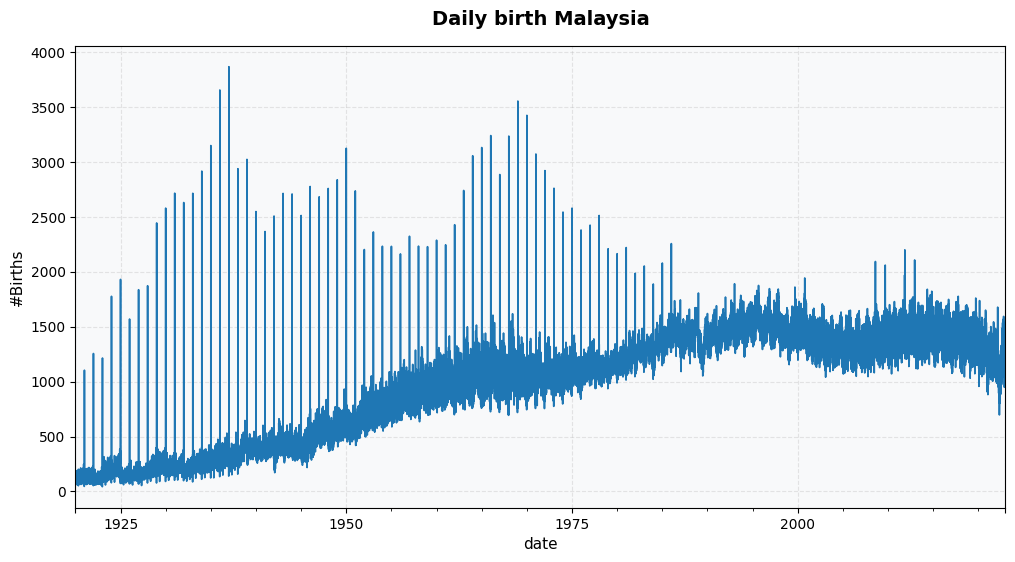

In [8]:
# set date as index for easy plotting
births_df_time_indexed = births_df.set_index('date')

# plot
fig, ax = create_timeseries_plot('Daily birth Malaysia', ylabel='#Births')
plot = births_df_time_indexed.plot(y='births', ax=ax, legend=False)

In [ ]:
unusual_obs_val = 2500

outliers_df = births_df.query(
    "births > @unusual_obs_val"
)
outliers_dates = outliers_df['date']
# print(outliers_dates)
print(f"Number of births exceeding {unusual_obs_val}: {len(outliers_dates)}")

Number of extreme observation: 35


In [10]:
day_months_string = outliers_dates.dt.strftime('%d-%m')
day_months_count = day_months_string.value_counts()
day_months_count

date
31-12    21
01-01    14
Name: count, dtype: int64

---
Question 2

In [ ]:
births_df['month_day'] = births_df['date'].dt.strftime("%m-%d")
# aggregate by month-day across all years
agg_births = births_df.groupby('month_day', as_index=False)['births'].mean()
# sort by calendar order for plotting
agg_births = agg_births.sort_values('month_day')

,month_day,births
0,01-01,1427.213592
1,01-02,1132.194175
2,01-03,1024.213592
3,01-04,966.359223
4,01-05,990.087379


In [53]:
agg_births.loc[agg_births['births'].nlargest(5).index]

,month_day,births
365,12-31,1793.961165
0,01-01,1427.213592
1,01-02,1132.194175
283,10-10,1122.067961
305,11-01,1074.786408


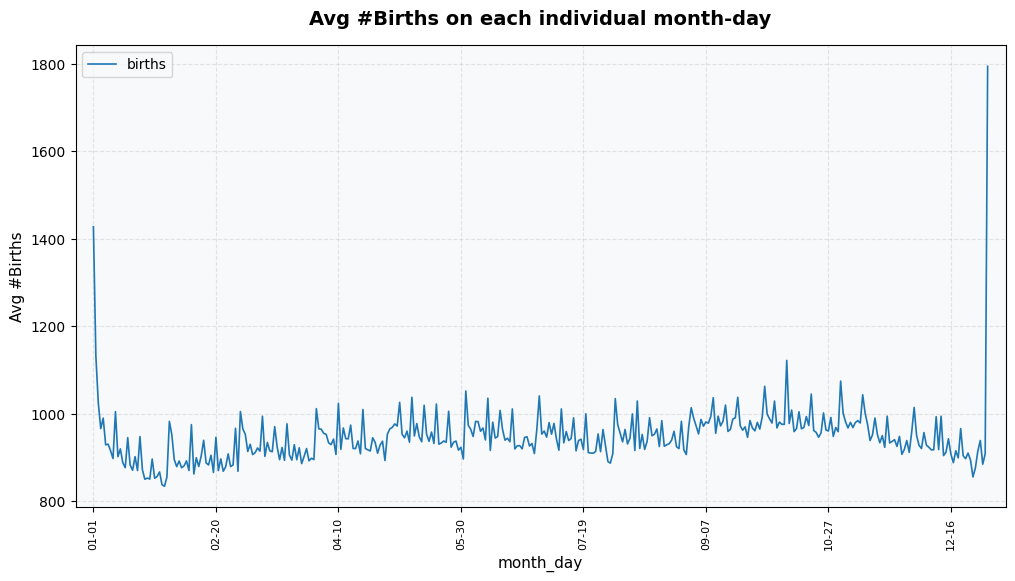

In [ ]:
fig, ax = create_timeseries_plot('Avg #Births on each individual month-day', ylabel='Avg #Births',
                                 xlabel='month-day')
plot = agg_births.plot(x='month_day', y='births', ax=ax, legend=False)
plt.xticks(rotation=90, fontsize=8)
plt.show()

---

Question 3

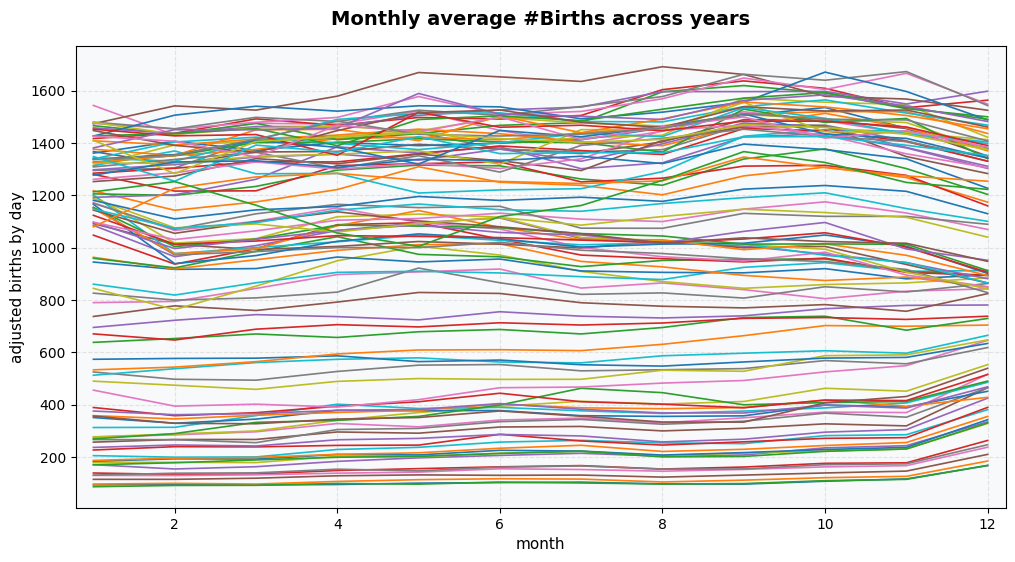

In [11]:
df_agg = births_df_time_indexed.copy()
df_agg['year'] = df_agg.index.year
df_agg['month'] = df_agg.index.month

monthly_agg = df_agg.groupby(['year', 'month'])['births'].mean()

# convert from MultiIndex Series to DataFrame for pivoting
monthly_agg_df = monthly_agg.reset_index()
# monthly_agg_df.head()

pivot_df = monthly_agg_df.pivot_table(
    index='month', columns='year', values='births'
)

fig, ax = create_timeseries_plot(title="Monthly average #Births across years",
                                 xlabel='Month', ylabel='adjusted births by day')
plot = pivot_df.plot(legend=False, ax=ax)

In [12]:
monthly_agg_df.head()

,year,month,births
0,1920,1,93.935484
1,1920,2,95.862069
2,1920,3,93.354839
3,1920,4,95.133333
4,1920,5,100.419355


In [13]:
yearly_avg = monthly_agg_df.groupby('year')['births'].mean()

top_n_years = yearly_avg.nlargest(5).index
print(top_n_years)

Index([1995, 1997, 1996, 2000, 1994], dtype='int32', name='year')


**ACF plot**

/tmp/ipykernel_16716/4182721239.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


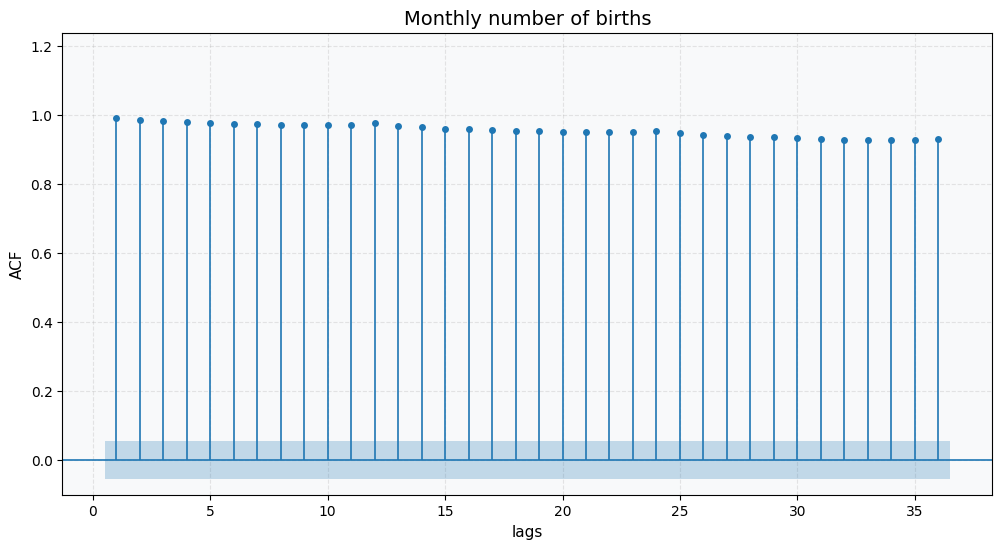

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
plot_acf(monthly_agg_df['births'], lags=36, ax=ax,
         zero=False, bartlett_confint=False, auto_ylims=True)

ax.set_title('Monthly number of births')
ax.set_xlabel('lags')
ax.set_ylabel("ACF")
ax.set_ylim(bottom=-0.1)

fig.show()

In [15]:
df_agg = births_df_time_indexed.copy()
df_agg['year'] = df_agg.index.year
df_agg['month'] = df_agg.index.month
df_agg.reset_index(inplace=True)
df_agg.tail()

,date,state,births,year,month
37616,2022-12-27,Malaysia,1168,2022,12
37617,2022-12-28,Malaysia,1293,2022,12
37618,2022-12-29,Malaysia,1237,2022,12
37619,2022-12-30,Malaysia,1168,2022,12
37620,2022-12-31,Malaysia,1093,2022,12


/tmp/ipykernel_16716/1270856012.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


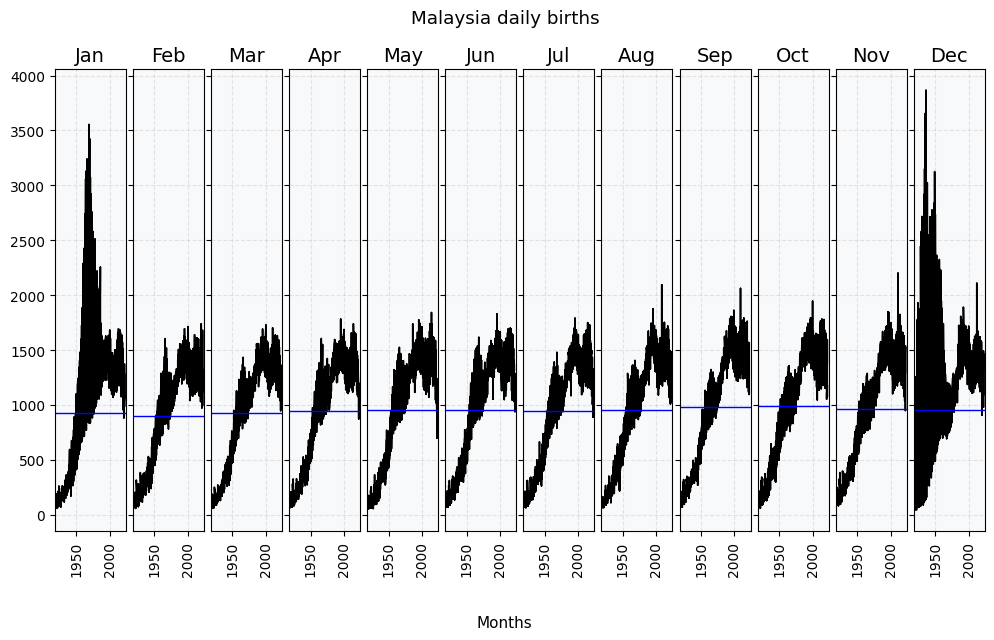

In [16]:
df_agg['month'] = df_agg['month'].apply(lambda x: calendar.month_name[x])
# print(df_agg['month'])
df_agg['month'] = pd.Categorical(
    df_agg['month'],
    categories=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ],
    ordered=True
)

fig, axes = plt.subplots(1, 12, sharey=True)
for i, month in enumerate(df_agg['month'].cat.categories):
    month_data = df_agg[df_agg['month'] == month]
    
    mean_births = month_data['births'].mean()
    axes[i].plot(month_data['year'], month_data['births'], color='black')
    axes[i].axhline(
        mean_births, color="blue", linestyle='-', linewidth=1, label='Average'
    )
    axes[i].set_title(month[:3])
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=90)
    
fig.suptitle("Malaysia daily births")
fig.text(0.5, -0.05, 'Months', ha='center')
fig.subplots_adjust(wspace=0.1)
fig.show()

Perform the same operations now with quarter column

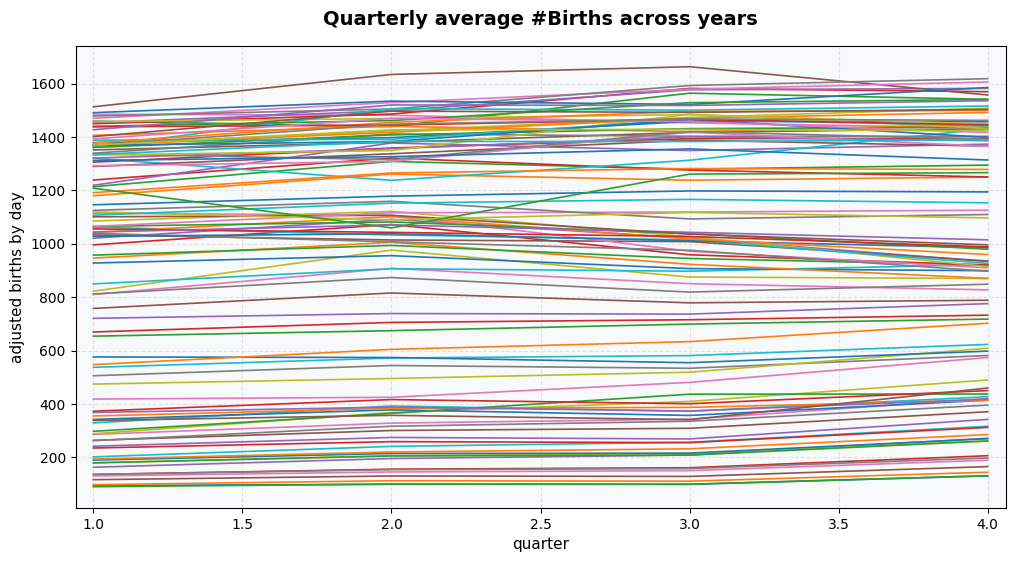

In [17]:
df_agg = births_df_time_indexed.copy()
df_agg['year'] = df_agg.index.year
df_agg['quarter'] = df_agg.index.quarter

quarterly_agg = df_agg.groupby(['year', 'quarter'])['births'].mean()

# convert from MultiIndex Series to DataFrame for pivoting
quarterly_agg_df = quarterly_agg.reset_index()
# quarterly_agg_df.head()

pivot_df = quarterly_agg_df.pivot_table(
    index='quarter', columns='year', values='births'
)

fig, ax = create_timeseries_plot(title="Quarterly average #Births across years",
                                 xlabel='Quarter', ylabel='adjusted births by day')
plot = pivot_df.plot(legend=False, ax=ax)

In [18]:
quarterly_agg_df.head()

,year,quarter,births
0,1920,1,94.351648
1,1920,2,99.340659
2,1920,3,99.445652
3,1920,4,130.706522
4,1921,1,97.711111


In [19]:
yearly_avg = quarterly_agg_df.groupby('year')['births'].mean()

top_n_years = yearly_avg.nlargest(3).index

print(top_n_years)

Index([1995, 1997, 1996], dtype='int32', name='year')


/tmp/ipykernel_16716/472049800.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


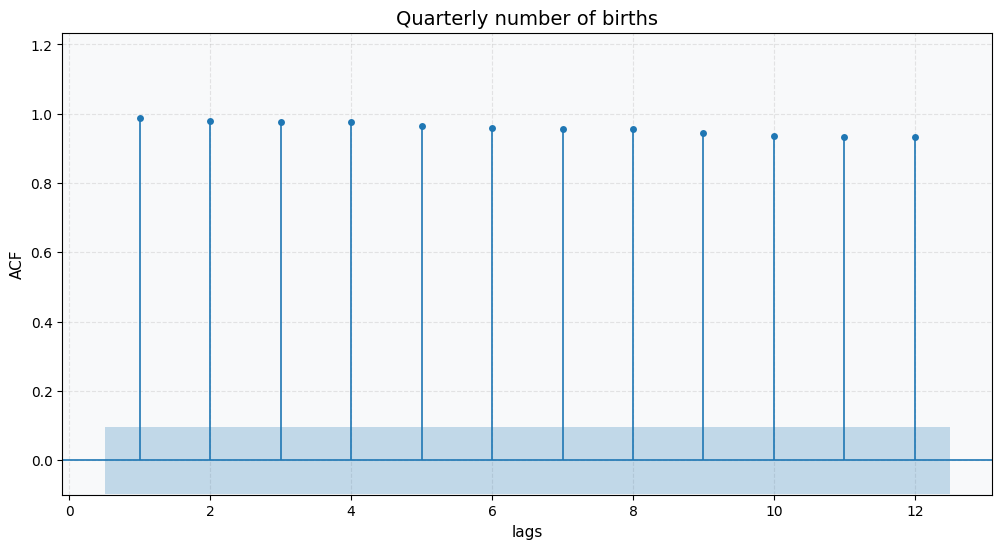

In [20]:
fig, ax = plt.subplots()
plot_acf(quarterly_agg_df['births'], lags=12, ax=ax,
         zero=False, bartlett_confint=False, auto_ylims=True)

ax.set_title('Quarterly number of births')
ax.set_xlabel('lags')
ax.set_ylabel("ACF")
ax.set_ylim(bottom=-0.1)

fig.show()

In [21]:
df_agg = births_df_time_indexed.copy()
df_agg['year'] = df_agg.index.year
df_agg['quarter'] = df_agg.index.quarter
df_agg.reset_index(inplace=True)
df_agg.tail()

,date,state,births,year,quarter
37616,2022-12-27,Malaysia,1168,2022,4
37617,2022-12-28,Malaysia,1293,2022,4
37618,2022-12-29,Malaysia,1237,2022,4
37619,2022-12-30,Malaysia,1168,2022,4
37620,2022-12-31,Malaysia,1093,2022,4


/tmp/ipykernel_16716/112279207.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


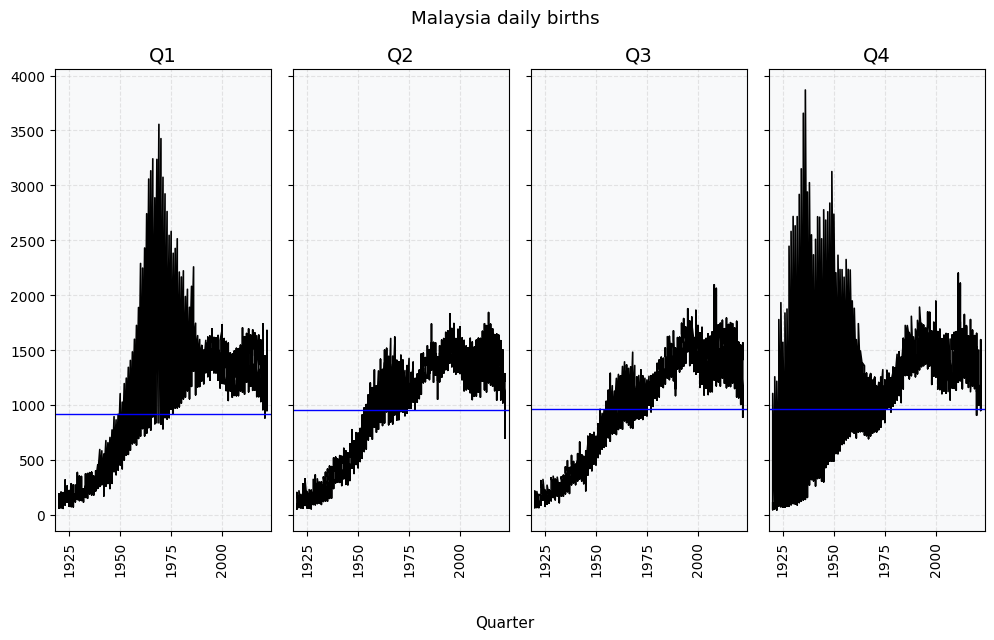

In [22]:
df_agg['quarter'] = df_agg['quarter'].apply(lambda x: f"Q{x}")
# print(df_agg['month'])
df_agg['quarter'] = pd.Categorical(
    df_agg['quarter'],
    categories=[
        "Q1", "Q2", "Q3", "Q4"
    ],
    ordered=True
)

fig, axes = plt.subplots(1, 4, sharey=True)
for i, quarter in enumerate(df_agg['quarter'].cat.categories):
    quarter_data = df_agg[df_agg['quarter'] == quarter]
    
    mean_births = quarter_data['births'].mean()
    axes[i].plot(quarter_data['year'], quarter_data['births'], color='black')
    axes[i].axhline(
        mean_births, color="blue", linestyle='-', linewidth=1, label='Average'
    )
    axes[i].set_title(quarter)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=90)
    
fig.suptitle("Malaysia daily births")
fig.text(0.5, -0.05, 'Quarter', ha='center')
fig.subplots_adjust(wspace=0.1)
fig.show()

---

Question 4

In [32]:
df_agg = births_df_time_indexed.copy()
weekday_map = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}
df_agg['weekday'] = df_agg.index.weekday
df_agg.reset_index(inplace=True)
df_agg.tail()

,date,state,births,weekday
37616,2022-12-27,Malaysia,1168,1
37617,2022-12-28,Malaysia,1293,2
37618,2022-12-29,Malaysia,1237,3
37619,2022-12-30,Malaysia,1168,4
37620,2022-12-31,Malaysia,1093,5


In [38]:
# comp
def detect_extremes(group: pd.DataFrame):
    Q1 = group['births'].quantile(0.25)
    Q3 = group['births'].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    extremes = group[(group['births'] > upper) | (group['births'] < lower)]
    return extremes

extreme_points = df_agg.groupby('weekday', group_keys=False).apply(detect_extremes)
print(f"Number of outliers: {len(extreme_points)}")
extreme_points.head()

Number of outliers: 22


/tmp/ipykernel_16716/1425306996.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  extreme_points = df_agg.groupby('weekday', group_keys=False).apply(detect_extremes)


,date,state,births,weekday
5478,1934-12-31,Malaysia,3150,0
17532,1968-01-01,Malaysia,3236,0
5843,1935-12-31,Malaysia,3656,1
16071,1964-01-01,Malaysia,3057,2
17898,1969-01-01,Malaysia,3555,2


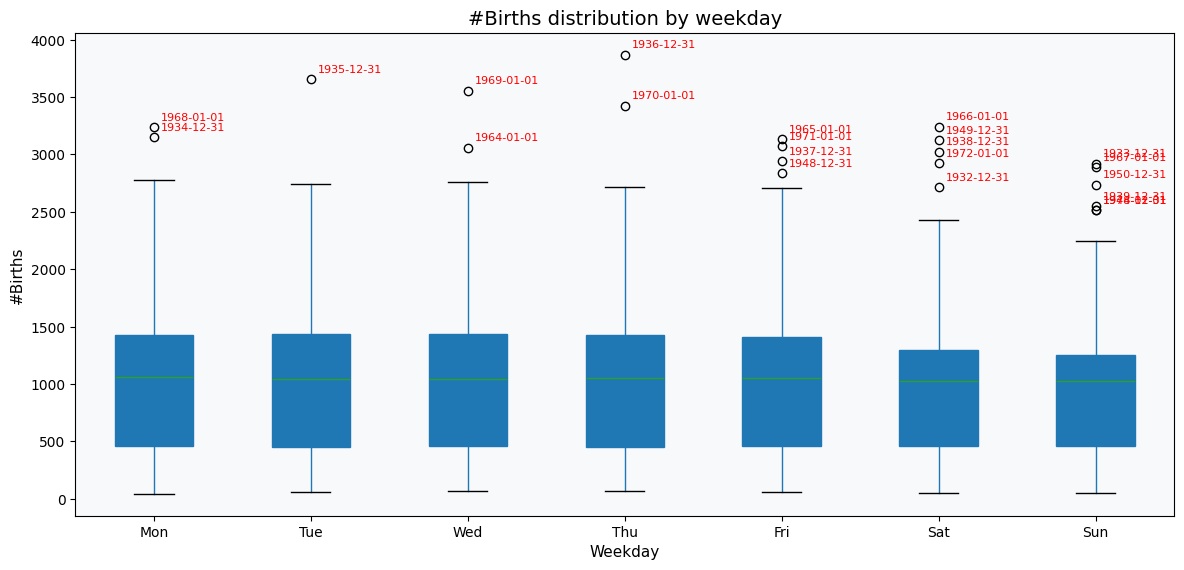

In [43]:
# create the box plot
box = df_agg.boxplot(column='births', by='weekday', grid=False, patch_artist=True)
plt.title('#Births distribution by weekday')
plt.suptitle('')
plt.xlabel('Weekday')
plt.ylabel('#Births')

# set xticks
plt.xticks(ticks=range(1, 8), labels=[weekday_map[i] for i in range(7)])

# annotate extreme observations
for _, row in extreme_points.iterrows():
    plt.annotate(
        f"{row['date'].strftime("%Y-%m-%d")}",
        xy=(row['weekday'] + 1, row['births']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        color='red',
        ha='left'
    )

plt.tight_layout()
plt.show()

---

Question 5

In [24]:
df_agg = births_df_time_indexed.copy()
df_agg['year'] = df_agg.index.year
df_agg.reset_index(inplace=True)
df_agg.tail()

,date,state,births,year
37616,2022-12-27,Malaysia,1168,2022
37617,2022-12-28,Malaysia,1293,2022
37618,2022-12-29,Malaysia,1237,2022
37619,2022-12-30,Malaysia,1168,2022
37620,2022-12-31,Malaysia,1093,2022


In [25]:
df_year = df_agg.groupby('year')['births'].mean()
df_births_year = df_year.reset_index()
df_births_year.head()

,year,births
0,1920,106.010929
1,1921,116.468493
2,1922,105.115068
3,1923,164.986301
4,1924,209.871585


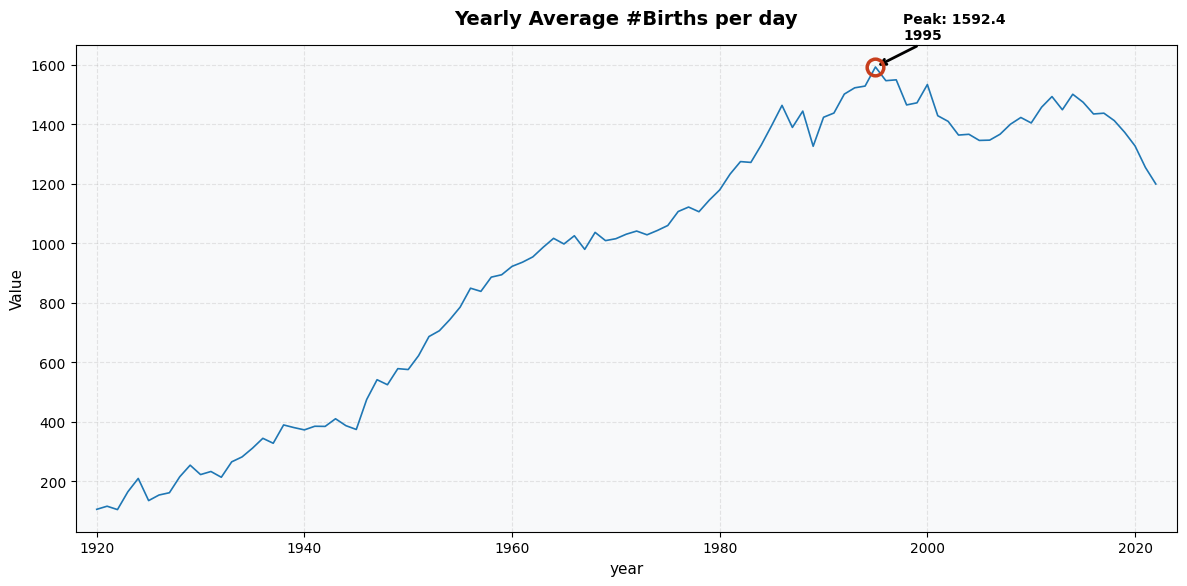

In [26]:
fig, ax = create_timeseries_plot(
    title='Yearly Average #Births per day',
    xlabel='Year'
)
# df_births_year.set_index('year', inplace=True)
plot = df_births_year.plot(x="year", y="births", ax=ax, legend=False)

# find the max value
max_idx = df_births_year['births'].idxmax()
max_year = df_births_year.loc[max_idx, 'year']
max_births = df_births_year.loc[max_idx, 'births']

# add a circle marker
ax.plot(max_year, max_births, 'o', markersize=12, 
        markerfacecolor='none', markeredgecolor='#C73E1D',
        markeredgewidth=2.5, zorder=5)

# add annotation with arrow
ax.annotate(
    f'Peak: {max_births:.1f}\n{int(max_year)}',
    xy=(max_year, max_births),
    xytext=(20, 20),   # offset
    textcoords='offset points',
    fontsize=10,
    fontweight='semibold',
    color='black',
    arrowprops=dict(arrowstyle='->', color='black', linewidth=2)
)

plt.tight_layout()
plt.show()

In [56]:
df_births_year.tail(20)

,year,births
83,2003,1363.597260
84,2004,1366.215847
85,2005,1345.578082
86,2006,1346.556164
87,2007,1366.419178
88,2008,1400.062842
89,2009,1422.676712
90,2010,1404.243836
91,2011,1457.241096
92,2012,1492.939891


Extra: how to calculate autocorrelation coefficients?

In [27]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [28]:
# Take the daily births dataset
acf_df = pd.DataFrame(
    {"Lag": range(24), 'ACF': sm.tsa.acf(births_df_copy["births"], nlags=23,
                                         fft=False, bartlett_confint=False)}
).set_index("Lag")
acf_df[1:]

,ACF
Lag,
1,0.954703
2,0.941583
3,0.937419
4,0.935819
5,0.939096
6,0.940960
7,0.949657
8,0.942853
9,0.935353
